In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv('HeartDiseaseTrain-Test.csv')
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [4]:
df.describe

<bound method NDFrame.describe of       age     sex  chest_pain_type  resting_blood_pressure  cholestoral  \
0      52    Male   Typical angina                     125          212   
1      53    Male   Typical angina                     140          203   
2      70    Male   Typical angina                     145          174   
3      61    Male   Typical angina                     148          203   
4      62  Female   Typical angina                     138          294   
...   ...     ...              ...                     ...          ...   
1020   59    Male  Atypical angina                     140          221   
1021   60    Male   Typical angina                     125          258   
1022   47    Male   Typical angina                     110          275   
1023   50  Female   Typical angina                     110          254   
1024   54    Male   Typical angina                     120          188   

         fasting_blood_sugar               rest_ecg  Max_heart_ra

In [19]:
# Step 1: Check for missing values
df.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [21]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Step 3: Check cleaned data
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,-0.268437,0.661504,3,-0.377636,-0.659332,1,2,0.821321,0,-0.060888,0,3,3,-1.026698
1,-0.158157,0.661504,3,0.479107,-0.833861,0,1,0.255968,1,1.727137,2,4,3,-1.026698
2,1.716595,0.661504,3,0.764688,-1.396233,1,2,-1.048692,1,1.301417,2,4,3,-1.026698
3,0.724079,0.661504,3,0.936037,-0.833861,1,2,0.516900,0,-0.912329,0,1,3,-1.026698
4,0.834359,-1.511706,3,0.364875,0.930822,0,2,-1.874977,0,0.705408,1,2,0,-1.026698


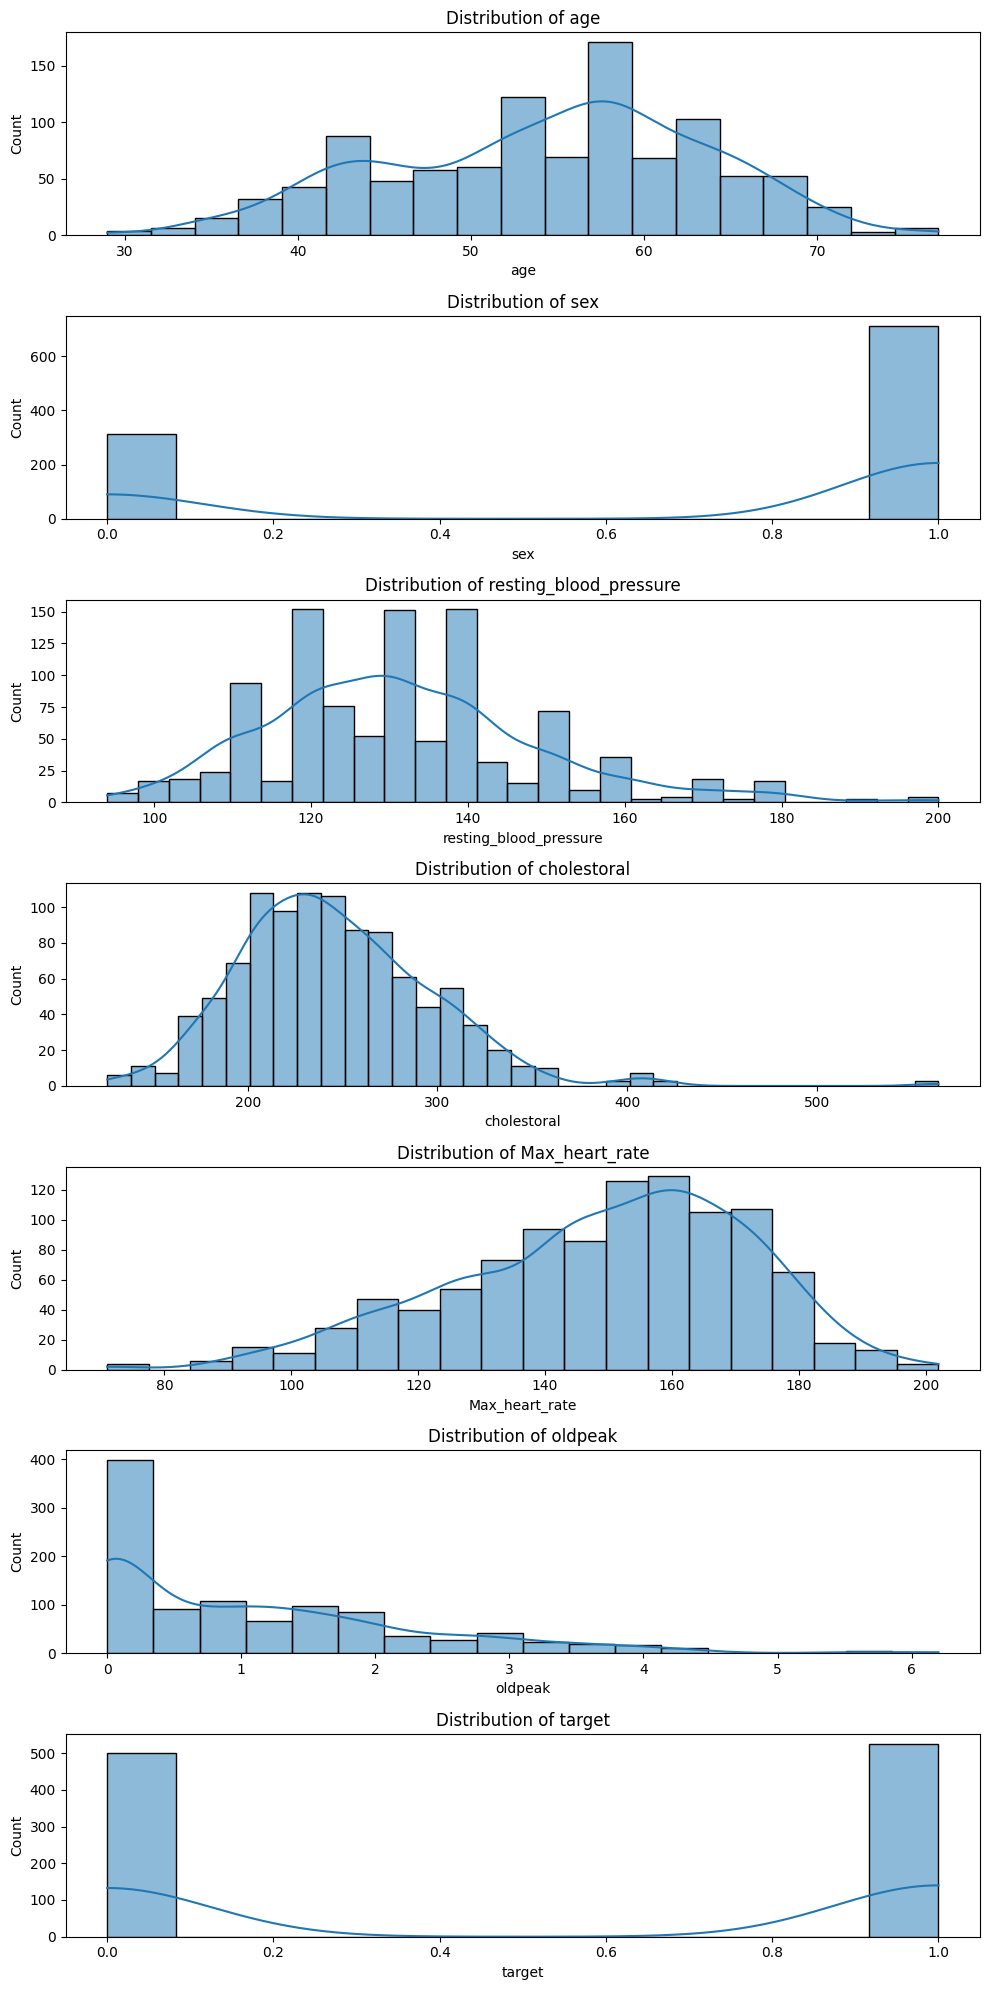

In [13]:
# Plotting distributions for numerical features
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 20))
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

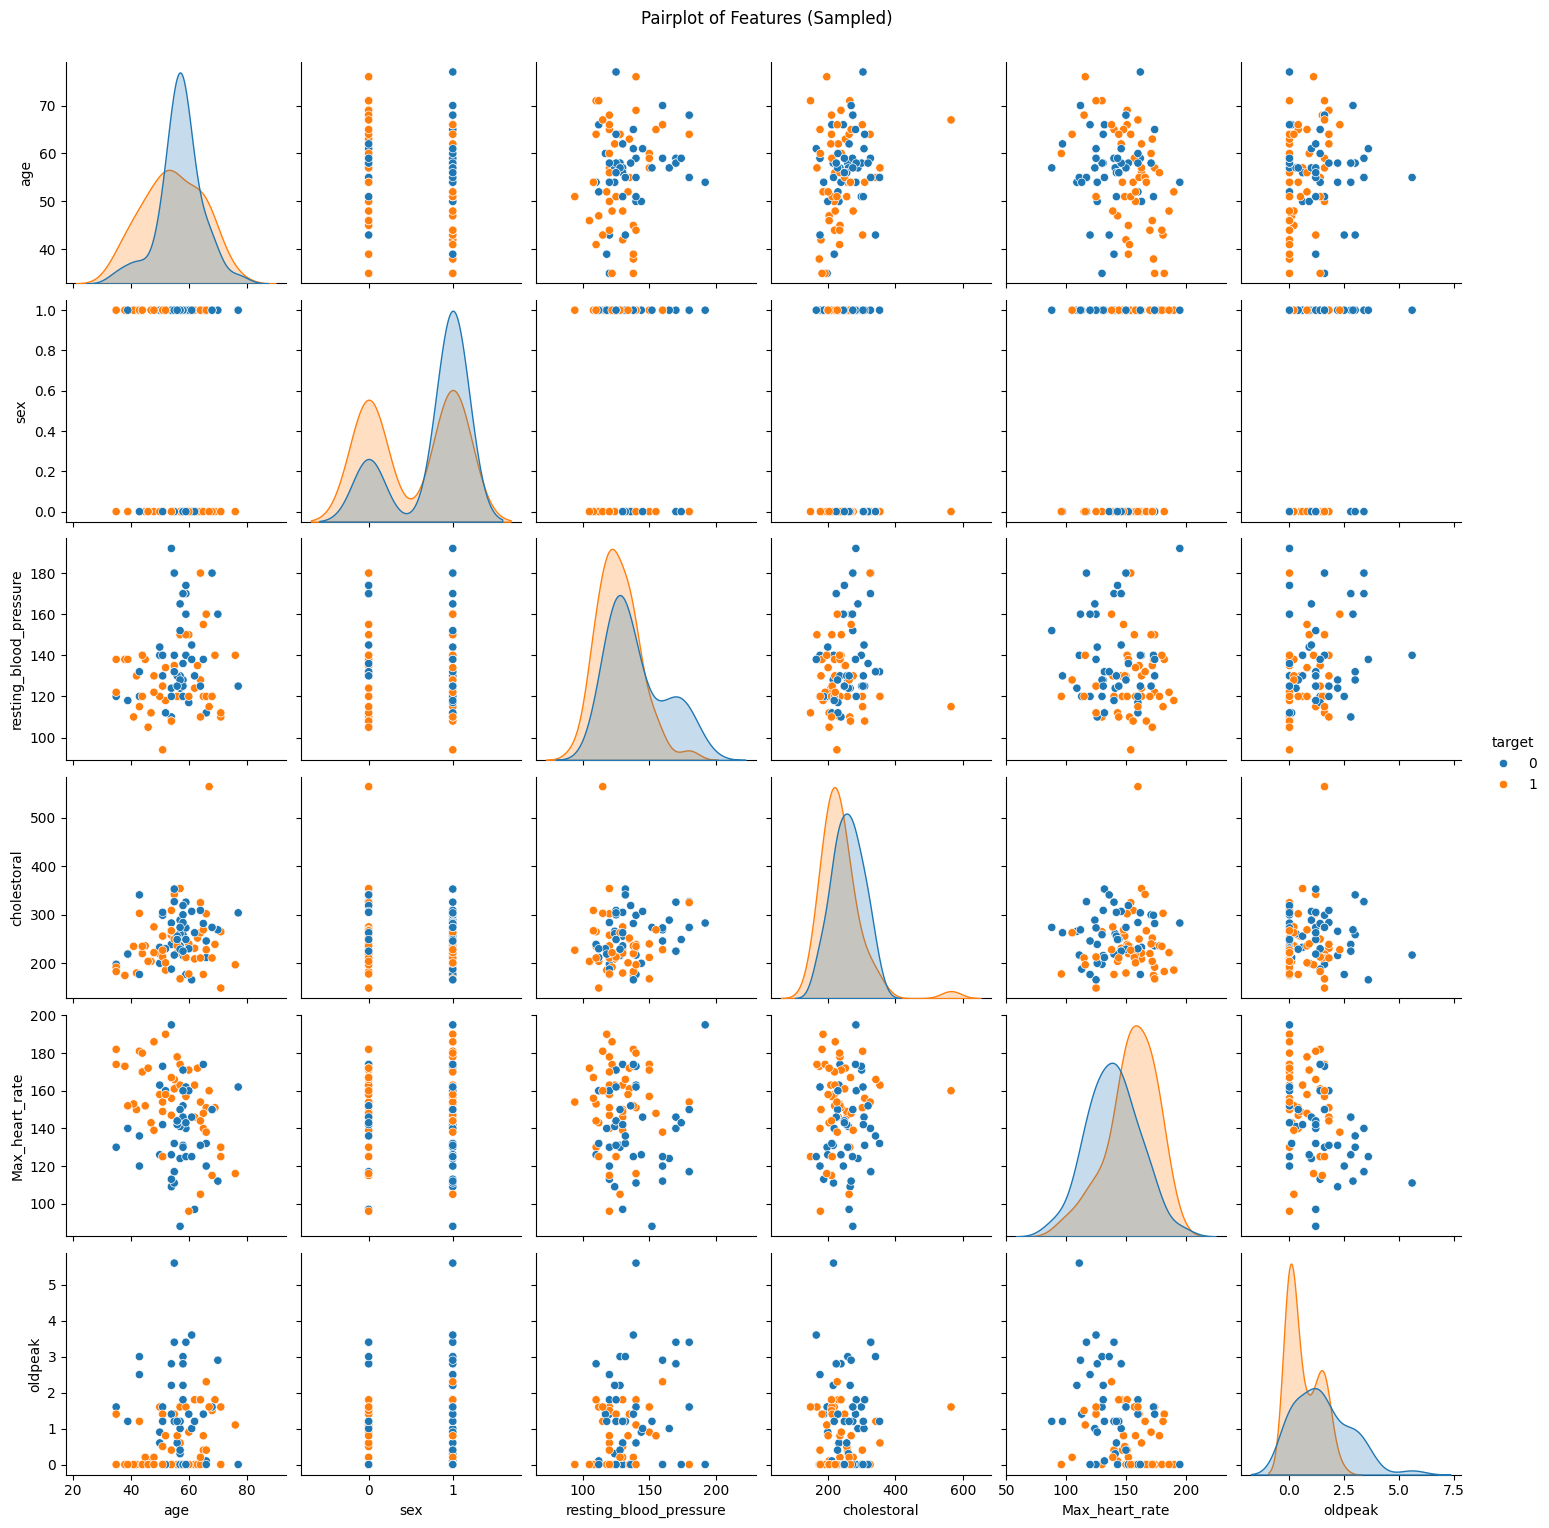

In [15]:
# 3. Pairplot for relationships (sampled for efficiency)
sns.pairplot(df.sample(100), diag_kind='kde', hue='target')
plt.suptitle("Pairplot of Features (Sampled)", y=1.02)
plt.show()

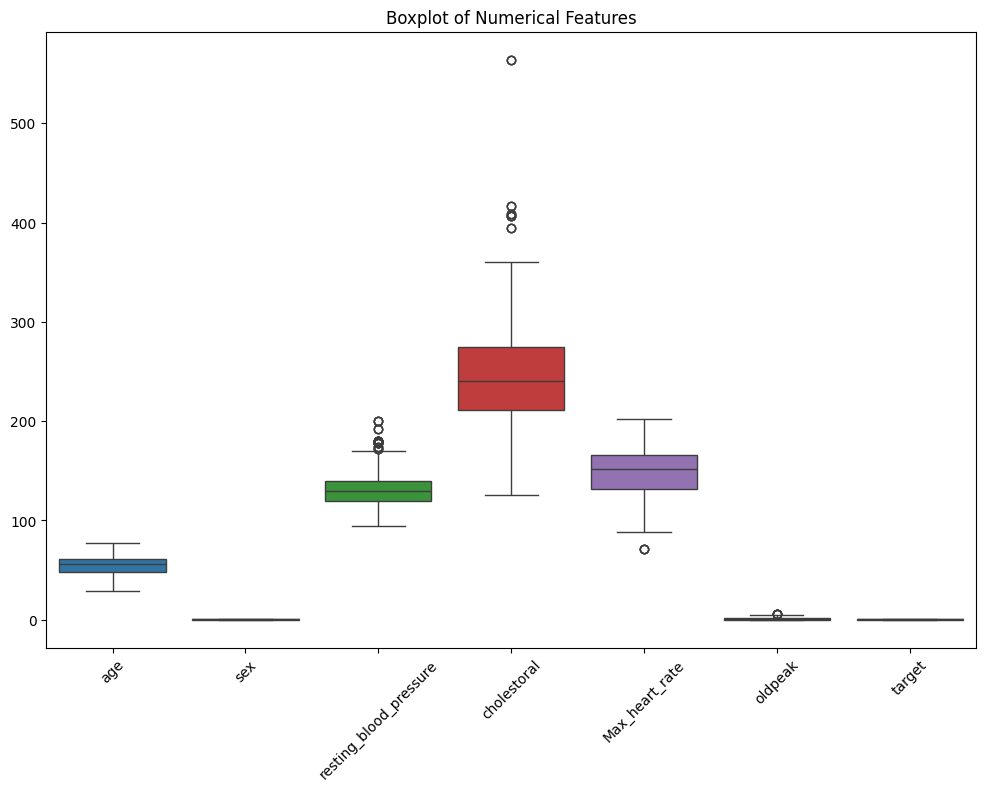

In [16]:
# 4. Boxplot for outlier detection in numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

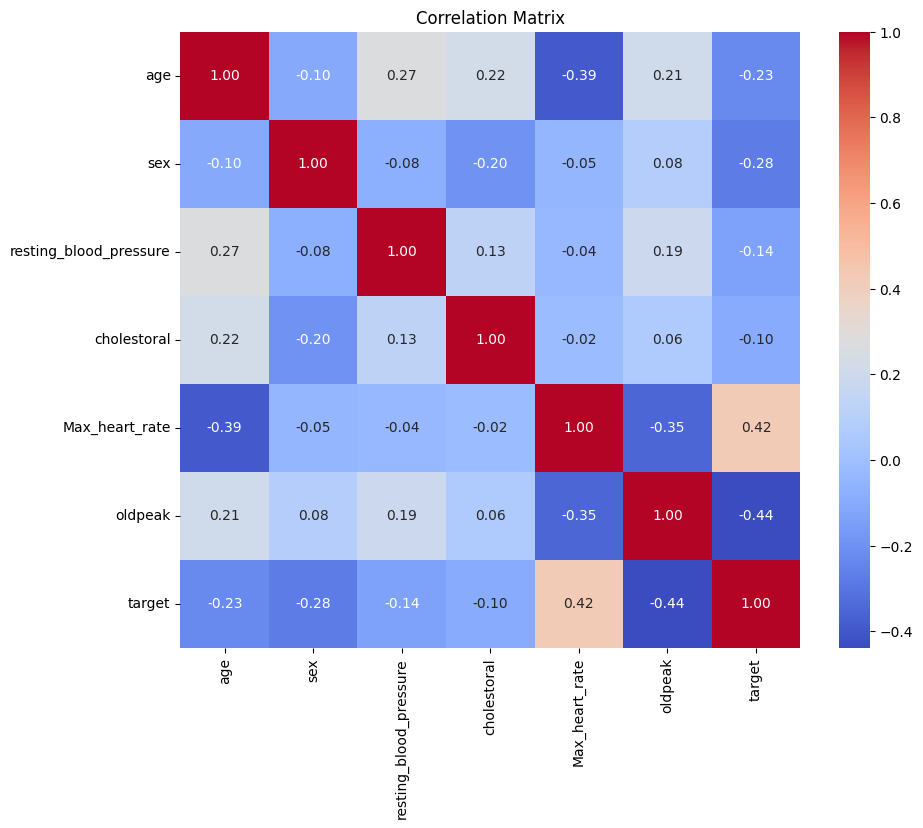

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [14]:
# Step 3: Display the correlation matrix
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


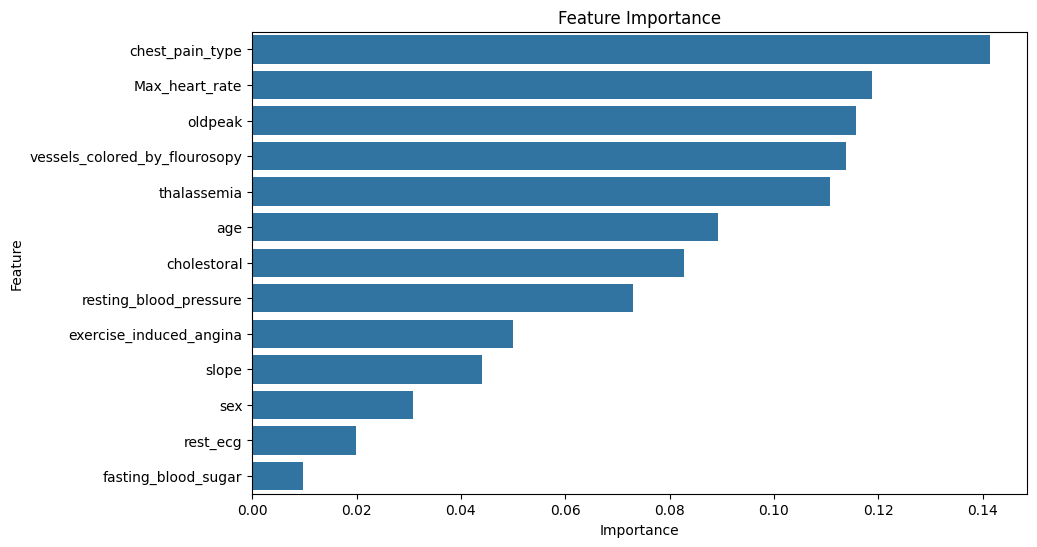

,Feature,Importance
2,chest_pain_type,0.141451
7,Max_heart_rate,0.118862
9,oldpeak,0.115788
11,vessels_colored_by_flourosopy,0.113749
12,thalassemia,0.110750
0,age,0.089222
4,cholestoral,0.082784
3,resting_blood_pressure,0.073079
8,exercise_induced_angina,0.049904
10,slope,0.044022


In [22]:
from sklearn.ensemble import RandomForestClassifier

# Restore target column to binary classification values (0 and 1)
df['target'] = (df['target'] > 0).astype(int)

# Re-separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Fit a Random Forest model to identify feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Retry fitting Random Forest for feature importance
rf_model.fit(X, y)

# Calculate feature importances
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

importance_df


In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score

# Step 1: Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Placeholder for results
results = []

# Step 3: Define MLP model
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_layers, activation_fn):
        super(MLPModel, self).__init__()
        layers = []
        for neurons in hidden_layers:
            layers.append(nn.Linear(input_size, neurons))
            layers.append(activation_fn())
            input_size = neurons
        layers.append(nn.Linear(input_size, 1))  # Output layer
        layers.append(nn.Sigmoid())  # Sigmoid for binary classification
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Step 4: Hyperparameter combinations
hidden_layer_options = [
    [4], [16], [32], [64],             # 1 hidden layer
    [4, 16], [16, 32], [32, 64],      # 2 hidden layers
    [4, 16, 32], [16, 32, 64]         # 3 hidden layers
]
activation_functions = [nn.Identity, nn.Sigmoid, nn.ReLU, nn.Tanh]
epoch_options = [1, 10, 25, 50, 100, 250]
learning_rate_options = [10, 1, 0.1, 0.01, 0.001, 0.0001]
batch_size_options = [16, 32, 64, 128, 256, 512]

# Step 5: Train and evaluate model for each combination
for hidden_layers in hidden_layer_options:
    for activation_fn in activation_functions:
        for epochs in epoch_options:
            for lr in learning_rate_options:
                for batch_size in batch_size_options:
                    # Initialize model, loss, and optimizer
                    model = MLPModel(X_train.shape[1], hidden_layers, activation_fn)
                    criterion = nn.BCELoss()
                    optimizer = optim.Adam(model.parameters(), lr=lr)

                    # Training loop
                    model.train()
                    for epoch in range(epochs):
                        for i in range(0, len(X_train_tensor), batch_size):
                            X_batch = X_train_tensor[i:i+batch_size]
                            y_batch = y_train_tensor[i:i+batch_size]

                            optimizer.zero_grad()
                            outputs = model(X_batch)
                            loss = criterion(outputs, y_batch)
                            loss.backward()
                            optimizer.step()

                    # Evaluate the model
                    model.eval()
                    with torch.no_grad():
                        predictions = model(X_test_tensor).round()
                        acc = (predictions.eq(y_test_tensor).sum() / len(y_test_tensor)).item()
                        mae = mean_absolute_error(y_test, predictions.numpy())
                        mse = mean_squared_error(y_test, predictions.numpy())
                        r2 = r2_score(y_test, predictions.numpy())

                    # Store the results
                    results.append({
                        'Hidden_Layers': hidden_layers,
                        'Activation': activation_fn.__name__,
                        'Epochs': epochs,
                        'Learning_Rate': lr,
                        'Batch_Size': batch_size,
                        'Loss': loss.item(),
                        'Accuracy': acc,
                        'MAE': mae,
                        'MSE': mse,
                        'R2': r2
                    })

# Convert results to DataFrame and save to CSV
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)

     Hidden_Layers Activation  Epochs  Learning_Rate  Batch_Size      Loss  \
4732      [16, 32]    Sigmoid     250           0.10         256  0.000207   
1274          [16]    Sigmoid     250           0.10          64  0.000191   
5601      [32, 64]    Sigmoid     250           0.01         128  0.000085   
3433          [64]       Tanh     250           0.10          32  0.000002   
5918      [32, 64]       Tanh      25           0.10          64  0.000384   
5919      [32, 64]       Tanh      25           0.10         128  0.001007   
1276          [16]    Sigmoid     250           0.10         256  0.000513   
5602      [32, 64]    Sigmoid     250           0.01         256  0.000151   
3152          [64]       ReLU      50           0.01          64  0.006277   
1241          [16]    Sigmoid     100           0.10         512  0.011442   

      Accuracy  MAE  MSE   R2  
4732       1.0  0.0  0.0  1.0  
1274       1.0  0.0  0.0  1.0  
5601       1.0  0.0  0.0  1.0  
3433       1.

In [28]:
from tabulate import tabulate

# Display the top 10 results in a tabular format using tabulate
top_results = results_df.head(10)
tabulated_results = tabulate(top_results, headers='keys', tablefmt='grid')

print(tabulated_results)


+------+-----------------+--------------+----------+-----------------+--------------+-------------+------------+-------+-------+------+
|      | Hidden_Layers   | Activation   |   Epochs |   Learning_Rate |   Batch_Size |        Loss |   Accuracy |   MAE |   MSE |   R2 |
+======+=================+==============+==========+=================+==============+=============+============+=======+=======+======+
| 4732 | [16, 32]        | Sigmoid      |      250 |            0.1  |          256 | 0.000206575 |          1 |     0 |     0 |    1 |
+------+-----------------+--------------+----------+-----------------+--------------+-------------+------------+-------+-------+------+
| 1274 | [16]            | Sigmoid      |      250 |            0.1  |           64 | 0.000191023 |          1 |     0 |     0 |    1 |
+------+-----------------+--------------+----------+-----------------+--------------+-------------+------------+-------+-------+------+
| 5601 | [32, 64]        | Sigmoid      |      2

In [29]:
model.eval()

# Generate predictions on the test set
with torch.no_grad():
    y_pred = model(X_test_tensor).round().numpy()
    y_true = y_test.values

# Create the classification report
report = classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1'])

# Print the classification report
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.84      0.73      0.78       102
     Class 1       0.76      0.86      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

